# Chapter06 代表的な離散型確率分布

- 推測統計
  - 限られた標本から母集団の平均や分散といった指標を推定することが目的
- ノンパラメトリックな手法
  - 母集団の確率分布の形状に何も仮定を置かず、指標を推定する方法
- パラメトリックな手法
  - 母集団の確率分布にある程度仮定を置いて、確率分布の期待値や分散を決める少数のパラメータのみを推定する方法

In [28]:
# ライブラリーの準備
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats

plt.style.use('seaborn')
rcParams['font.family'] = 'IPAexgothic'
%precision 3
%matplotlib inline


In [29]:
# グラフの線の種類
linestyles = ['-', '--', ':']

# 関数の定義
def E(x, g=lambda x: x):
    """期待値の関数"""
    x_set, f = X
    return np.sum(
        [g(x_k) * f(x_k) 
        for x_k in x_set]
    )

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum(
        [g(x_k - mean)**2 * f(x_k)
        for x_k in x_set]
    )

def check_prob(X):
    """確率変数を引数に、
    その確率変数が確率の性質を満たしているか確認し、
    期待値と分散を返す関数
    """
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), "負の確率があります。"

    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f"確率の和が{prob_sum}になりました。"

    print(f"期待値: {E(X):.4}")
    print(f"分散: {V(X):.4}")

def plot_prob(X):
    """確率変数を引数に、
    その確率変数の確率関数と期待値を図示するための関数
    """
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', colors='red')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()

    plt.show()


## 6.1 ベルヌーイ分布（Bernoulli distribution）

- とりうる値が「0」と「1」しかない確率分布
- ベルヌーイ分布に従う確率変数の試行を、「ベルヌーイ試行」という
- ベルヌーイ試行
  - 「1」が出ることを「成功」
  - 「0」が出ることを「失敗」
- ベルヌーイ分布
  - 1が出る確率を$p$
  - 0が出る確率$1-p$

**ベルヌーイ分布$Bern(p)$の確率関数**

$0 \leq p \leq 1$

$$
f(x) = 
\begin{cases}
p^x(1 - p)^{(1-x)} ~~~ (x \in \{0, 1\}) \\
0 ~~~~~~~~~~~~~~~~~~~~~~~~ (otherwise)
\end{cases}
$$

- この関数に「1」を代入すると、「$p$」が返り、
- 「0」を代入すると、「$1 - p$」が返る。

**コインを投げて表が出るかどうか**

- 表と裏が出る確率が等しいふつうのコインを投げて、
- 「表」が出たら「1」、「裏」が出たら「0」とする確率変数$X$は、
- $Bern(1/2)$に従う。

このことからコインを投げて表が出る確率は、

$$
P(X = 1) = (1/2)^1 * (1 - 1/2)^{(1 - 1)} = 1/2
$$

と求めることができる。

**サイコロを1回振って、「6」が出るかどうか**

- すべての出目が出る確率が等しいふつうのサイコロを振って、
- 「6」が出たら「1」、「それ以外」なら「0」とする確率変数$X$は、
- $Bern(1/6)$に従う。

このことからサイコロを振って「6」が出ない確率は、

$$
P(X = 0) = (1/6)^0 * (1 - 1/6)^{1 - 0} = 5/6
$$

と求めることができる。

**ベルヌーイ分布の期待値と分散**

$X \sim Bern(p)$とするとき、

$$
\begin{align*}
E(X) &= p \\
V(X) &= p(1 -p)
\end{align*}
$$

In [30]:
def Bern(p):
    """ベルヌーイ分布
    パラメータpを引数に、x_setとfを返す関数
    """
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p**x * (1 - p)**(1 - x)
        else:
            return 0
    return x_set, f

In [31]:
# Bern(0.3)に従う確率変数Xを作成する
p = 0.3
X = Bern(p)
X

(array([0, 1]), <function __main__.Bern.<locals>.f(x)>)

In [32]:
# Bern(0.3)に従う確率変数Xの期待値と分散
check_prob(X)

期待値: 0.3
分散: 0.21


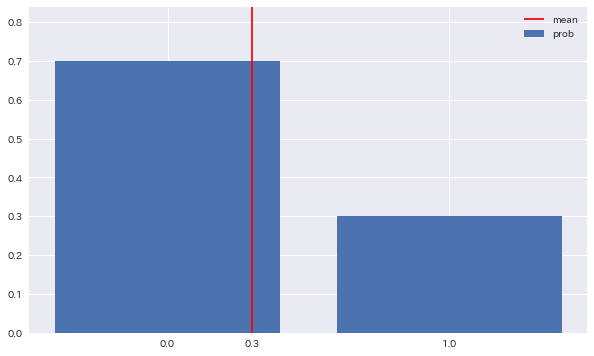

In [33]:
# Bern(0.3)に従う確率変数Xを図示する
plot_prob(X)

In [34]:
# scipy.statsを使った実装
# rv(random variable, 確率変数)
p = 0.3
rv = stats.bernoulli(p)

In [35]:
# pmf()メソッドは、確率関数を計算できる
rv.pmf(0), rv.pmf(1)

(0.700, 0.300)

In [36]:
# pmf()メソッドに、リストを渡す、Numpy.arrayが返ってくる
rv.pmf([0, 1])

array([0.7, 0.3])

In [37]:
# cdf()メソッドで、累積密度関数を計算する
rv.cdf([0, 1])

array([0.7, 1. ])

In [38]:
# mean()メソッド、var()メソッド
rv.mean(), rv.var()

(0.300, 0.210)